In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage

In [7]:
img_color=cv2.imread('/Users/siddharthnayak/Downloads/Cristiano-Ronaldo-HD-Portugal-wallpaper-1024x576.jpg')
img=cv2.imread('/Users/siddharthnayak/Downloads/Cristiano-Ronaldo-HD-Portugal-wallpaper-1024x576.jpg',0)

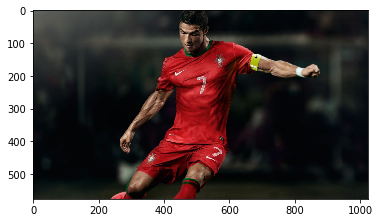

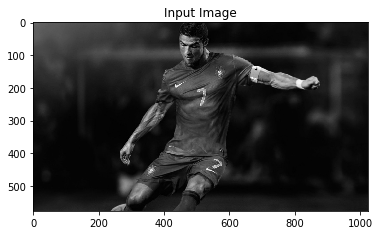

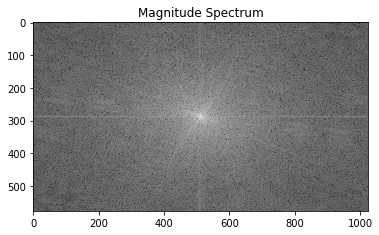

In [12]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f) #Shift the zero-frequency component to the center of the spectrum.
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.show()
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum') 
plt.show()

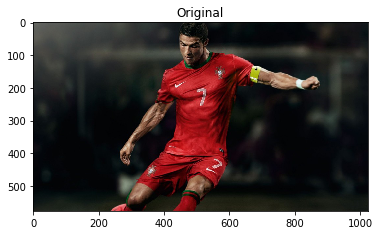

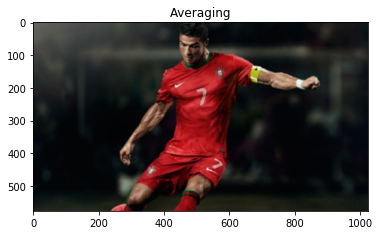

In [15]:
#average filtering
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img_color,-1,kernel)
 
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.show()
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Averaging')
plt.show()

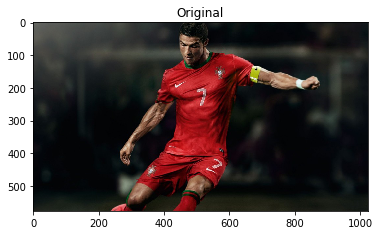

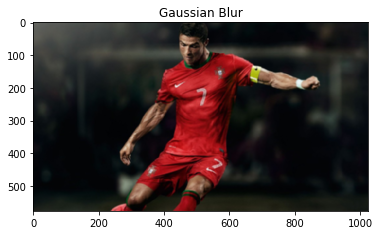

In [27]:
#Gaussian filtering
gauss_blur=cv2.GaussianBlur(img_color,ksize=(5,5),sigmaX=10)
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.show()
plt.imshow(cv2.cvtColor(gauss_blur, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Blur')
plt.show()


In [85]:
def lowpass(D_0,X_size,Y_size):
    '''
    returns a low pass filter kernel.
    D_0=cuttoff frequency
    size= size of the kernel
    '''
    H=np.zeros((X_size,Y_size))
    if X_size%2==1:
        x=np.arange(-int(X_size/2),int(X_size/2)+1,1)
    if X_size%2==0:
        x=np.arange(-int(X_size/2)+1,int(X_size/2)+1,1)
    if Y_size%2==1:
        y=np.arange(-int(Y_size/2),int(Y_size/2)+1,1)
    if Y_size%2==0:
        y=np.arange(-int(Y_size/2)+1,int(Y_size/2)+1,1)    
    Y,X=np.meshgrid(y,x)
    ii=np.where(X**2+Y**2<=D_0**2)
    H[ii]=1.0 
    return H

def highpass(D_0,X_size,Y_size):
    '''
    returns a high pass filter kernel.
    D_0=cuttoff frequency
    size= size of the kernel
    '''
    H=np.zeros((X_size,Y_size))
    if X_size%2==1:
        x=np.arange(-int(X_size/2),int(X_size/2)+1,1)
    if X_size%2==0:
        x=np.arange(-int(X_size/2)+1,int(X_size/2)+1,1)
    if Y_size%2==1:
        y=np.arange(-int(Y_size/2),int(Y_size/2)+1,1)
    if Y_size%2==0:
        y=np.arange(-int(Y_size/2)+1,int(Y_size/2)+1,1)    
    Y,X=np.meshgrid(y,x)
    ii=np.where(X**2+Y**2>=D_0**2)
    H[ii]=1.0 
    return H
    

(576, 1024)


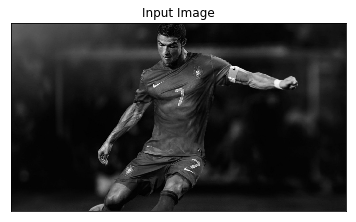

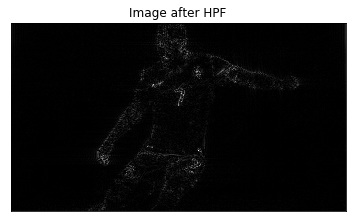

In [101]:
rows, cols = img.shape
print(img.shape)
crow,ccol = rows/2 , cols/2
B=100
fshift[int(crow-B):int(crow+B), int(ccol-B):int(ccol+B)] = 0 #high pass filter
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.show()


plt.show()

(576, 1024)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


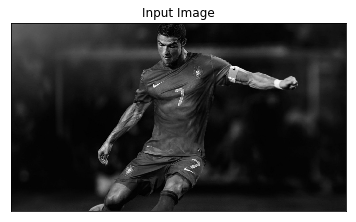

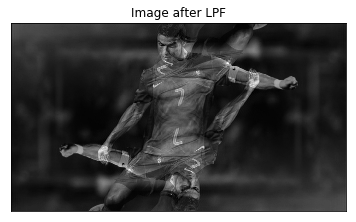

In [115]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
rows, cols = img.shape
print(img.shape)
crow,ccol = rows/2 , cols/2
B=200 #bandwidth
fshift_new=np.zeros(img.shape)
f_new=fshift[int(crow-B):int(crow+B), int(ccol-B):int(ccol+B)] 
fshift_new[int(crow-B):int(crow+B), int(ccol-B):int(ccol+B)]=f_new
f_ishift = np.fft.ifftshift(fshift_new)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(img_back, cmap = 'gray')
plt.title('Image after LPF'), plt.xticks([]), plt.yticks([])
plt.show()


plt.show()

In [108]:
f_new

array([[  4254.41085845 +3468.81277462j,  -5597.13906118 -4401.83228655j,
          1254.41726971+10115.74991246j, ...,
          4481.33032751 -3100.39632578j,  -1174.10258225 +2893.17649458j,
         -5797.65258245 -5862.25976912j],
       [  5744.17893774 -1969.25692625j,  -9915.92466652 +3243.5619203j ,
         12470.69912146 +1193.37741073j, ...,
           481.44925157 +3774.1059204j ,   1582.76731133 -2907.06133747j,
         -2868.22746459 +5441.41843387j],
       [  2871.51199261 -4156.28046146j,  -2191.61047846  +189.9886048j ,
          -805.65468019 -3804.39881757j, ...,
         -9238.24950815 +7851.94010616j,   5415.58232540 -9403.17576764j,
          4906.36064571+11499.26996794j],
       ..., 
       [  3320.73132795 -1968.67212871j,   6036.60649136  -967.15315459j,
         -5802.08355502 +6035.34309224j, ...,
          2403.11650646  -332.7945135j ,  -5723.59304553 +4155.33650316j,
          3945.42797374 -3958.14705342j],
       [ -9396.04455668 +4087.53544103j,   